In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('CropCGA.csv')
df.head()

,Taluka_Name,Crop_Varieties,N_kg_ha,P_kg_ha,K_kg_ha,pH,Rainfall_mm,Temperature_C,Crop_yield_q_ha
0,Chandgad,Ghansal,120,50,57,7.3,1900,30,35.5
1,Chandgad,Ghansal,110,45,47,7.5,1800,31,35.5
2,Chandgad,Ghansal,115,48,57,7.8,1850,34,35.2
3,Chandgad,Ghansal,120,42,58,6.8,1750,29,35.6
4,Chandgad,Ghansal,100,43,69,6.9,1775,24,36.5


In [3]:
df.shape


(299, 9)

In [4]:
df.isnull().sum()


Taluka_Name        0
Crop_Varieties     0
N_kg_ha            0
P_kg_ha            0
K_kg_ha            0
pH                 0
Rainfall_mm        0
Temperature_C      0
Crop_yield_q_ha    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Taluka_Name      299 non-null    object 
 1   Crop_Varieties   299 non-null    object 
 2   N_kg_ha          299 non-null    int64  
 3   P_kg_ha          299 non-null    int64  
 4   K_kg_ha          299 non-null    int64  
 5   pH               299 non-null    float64
 6   Rainfall_mm      299 non-null    int64  
 7   Temperature_C    299 non-null    int64  
 8   Crop_yield_q_ha  299 non-null    float64
dtypes: float64(2), int64(5), object(2)
memory usage: 21.1+ KB


In [6]:
df.duplicated().sum()


np.int64(0)

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.describe()

,N_kg_ha,P_kg_ha,K_kg_ha,pH,Rainfall_mm,Temperature_C,Crop_yield_q_ha
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,111.588629,53.153846,53.986622,6.818729,2072.050167,30.735786,27.892977
std,7.028323,8.832316,8.532596,0.702668,446.718656,3.176110,4.849346
min,100.000000,42.000000,42.000000,5.700000,935.000000,24.000000,18.500000
25%,105.000000,47.000000,47.000000,6.200000,1835.000000,28.000000,24.850000
50%,115.000000,49.000000,57.000000,6.800000,1995.000000,31.000000,27.900000
75%,120.000000,58.000000,58.000000,7.300000,2257.500000,34.000000,29.500000
max,120.000000,74.000000,74.000000,8.000000,3095.000000,36.000000,38.800000


<Axes: xlabel='count', ylabel='Crop_Varieties'>

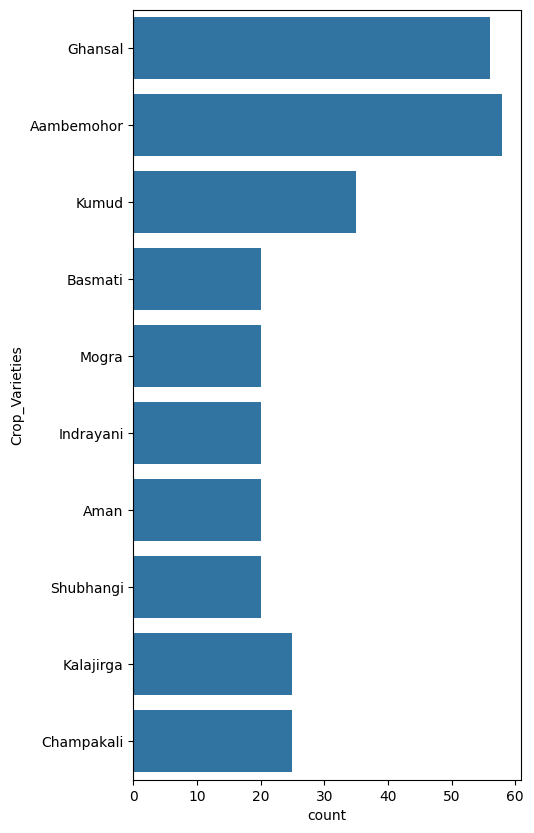

In [10]:
plt.figure(figsize=(5,10))
sns.countplot(y=df['Crop_Varieties'])

In [11]:
crop_varieties = (df['Crop_Varieties'].unique())

In [12]:
yield_per_taluka = []
for crop in crop_varieties:
    yield_per_taluka.append(df[df['Crop_Varieties']==crop]['Crop_yield_q_ha'].sum())

In [13]:
yield_per_taluka

[np.float64(2008.2),
 np.float64(1214.4),
 np.float64(995.0999999999999),
 np.float64(569.9999999999999),
 np.float64(571.1999999999999),
 np.float64(569.9999999999999),
 np.float64(568.1999999999999),
 np.float64(504.9),
 np.float64(710.5),
 np.float64(627.5000000000001)]

<Axes: >

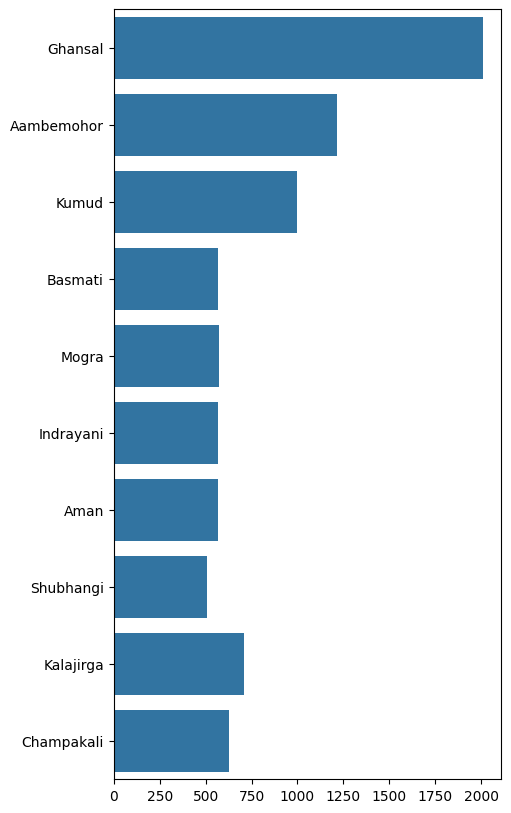

In [14]:
plt.figure(figsize=(5,10))
sns.barplot(y=crop_varieties, x=yield_per_taluka)

In [15]:
df['Crop_Varieties'].value_counts()

Crop_Varieties
Aambemohor    58
Ghansal       56
Kumud         35
Champakali    25
Kalajirga     25
Basmati       20
Indrayani     20
Mogra         20
Shubhangi     20
Aman          20
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Crop_Varieties'>

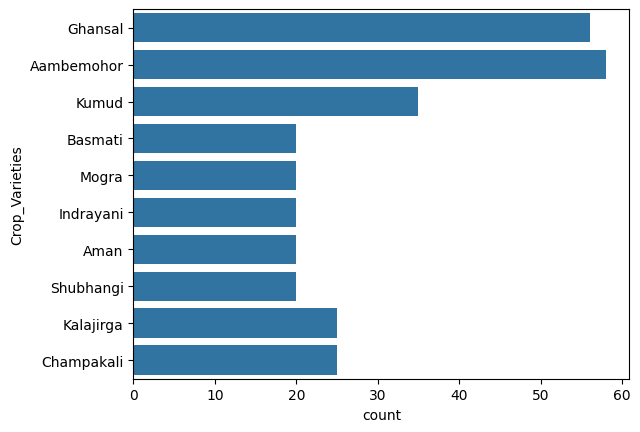

In [16]:
sns.countplot(y=df['Crop_Varieties'])

In [17]:
x = df.drop('Crop_yield_q_ha',axis=1)
y = df['Crop_yield_q_ha']

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)


In [20]:
X_train

,Taluka_Name,Crop_Varieties,N_kg_ha,P_kg_ha,K_kg_ha,pH,Rainfall_mm,Temperature_C
6,Chandgad,Ghansal,110,43,58,6.9,2060,26
183,Gadhinglaj,Shubhangi,110,58,58,8.0,2015,35
185,Gadhinglaj,Shubhangi,120,48,48,7.8,2150,31
146,Gadhinglaj,Indrayani,110,47,48,5.9,2475,31
30,Chandgad,Ghansal,100,47,59,7.5,2060,35
...,...,...,...,...,...,...,...,...
188,Gadhinglaj,Shubhangi,110,48,57,7.5,2170,27
71,Chandgad,Kumud,100,42,57,5.9,1735,29
106,Gadhinglaj,Basmati,115,74,47,6.1,985,24
270,Ajara,Champakali,115,48,69,7.3,2865,36


In [21]:
X_test

,Taluka_Name,Crop_Varieties,N_kg_ha,P_kg_ha,K_kg_ha,pH,Rainfall_mm,Temperature_C
281,Ajara,Aambemohor,110,48,48,7.8,1920,28
265,Ajara,Champakali,105,47,68,5.9,2915,34
164,Gadhinglaj,Aman,120,43,48,6.4,1915,32
9,Chandgad,Ghansal,120,47,47,6.3,1900,28
77,Chandgad,Kumud,115,47,58,6.3,1835,28
278,Ajara,Aambemohor,100,59,59,7.9,2180,26
93,Chandgad,Kumud,115,47,58,7.2,1950,31
109,Gadhinglaj,Basmati,105,47,68,6.4,1035,28
5,Chandgad,Ghansal,105,49,59,6.8,1950,28
173,Gadhinglaj,Aman,105,47,48,7.8,2170,29


In [22]:
y_train

6      34.8
183    25.4
185    25.8
146    29.3
30     36.4
       ... 
188    24.7
71     29.3
106    29.5
270    24.7
102    27.9
Name: Crop_yield_q_ha, Length: 239, dtype: float64

In [23]:
y_test

281    18.5
265    25.4
164    29.5
9      35.7
77     28.5
278    22.9
93     29.3
109    29.5
5      34.5
173    29.5
97     28.1
195    25.6
184    25.1
154    29.5
57     21.5
60     20.4
147    29.3
108    27.9
63     19.1
140    27.9
155    27.5
104    28.5
247    29.5
46     22.9
42     21.3
275    21.5
280    19.3
116    29.5
213    35.2
236    27.9
17     36.1
239    29.3
33     18.5
24     36.9
45     22.8
7      35.9
113    28.5
194    25.6
111    27.9
92     28.5
75     27.2
82     28.1
118    27.9
76     28.1
129    28.5
197    25.4
210    36.5
288    21.3
219    35.8
178    27.9
144    28.1
186    25.1
84     29.3
248    27.5
277    22.8
73     27.5
244    28.1
25     36.7
209    38.8
59     20.6
Name: Crop_yield_q_ha, dtype: float64

In [24]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer 

In [25]:
ohe = OneHotEncoder(drop='first')
scaler = StandardScaler()

In [26]:
X_train.head()

,Taluka_Name,Crop_Varieties,N_kg_ha,P_kg_ha,K_kg_ha,pH,Rainfall_mm,Temperature_C
6,Chandgad,Ghansal,110,43,58,6.9,2060,26
183,Gadhinglaj,Shubhangi,110,58,58,8.0,2015,35
185,Gadhinglaj,Shubhangi,120,48,48,7.8,2150,31
146,Gadhinglaj,Indrayani,110,47,48,5.9,2475,31
30,Chandgad,Ghansal,100,47,59,7.5,2060,35


In [27]:
preprocessor = ColumnTransformer(
    transformers = [
        ('onehotencoder', ohe, [0,1]),
        ('standrization',scaler, [2,3,4,5,6,7])
    ],
    remainder='passthrough'
)

In [28]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder', OneHotEncoder(drop='first'),
                                 [0, 1]),
                                ('standrization', StandardScaler(),
                                 [2, 3, 4, 5, 6, 7])])

In [29]:
X_train_dummy = preprocessor.fit_transform(X_train)
X_test_dummy = preprocessor.transform(X_test)

In [30]:
X_train_dummy

array([[ 1.        ,  0.        ,  0.        , ...,  0.11711393,
        -0.0751576 , -1.54998795],
       [ 0.        ,  1.        ,  0.        , ...,  1.69604991,
        -0.17603368,  1.26353448],
       [ 0.        ,  1.        ,  0.        , ...,  1.40897064,
         0.12659455,  0.01308007],
       ...,
       [ 0.        ,  1.        ,  0.        , ..., -1.03120315,
        -2.48497501, -2.17521516],
       [ 0.        ,  0.        ,  0.        , ...,  0.69127247,
         1.72940334,  1.57614808],
       [ 0.        ,  1.        ,  0.        , ...,  0.11711393,
        -2.57464264, -0.29953354]], shape=(239, 17))

In [31]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [32]:
models = {
    'ls':LinearRegression(),
    'lss':Lasso(),
    'rg':Ridge(),
    'Knr':KNeighborsRegressor(),
    'dtr':DecisionTreeRegressor()
}

for name, mod in models.items():
    mod.fit(X_train_dummy, y_train)
    y_pred = mod.predict(X_test_dummy)

    print(f"{name} MSE : {mean_absolute_error(y_test,y_pred)} score {r2_score(y_test,y_pred)}")

ls MSE : 0.755858196580611 score 0.9577700594127079
lss MSE : 3.2004299016294953 score 0.3168575527470098
rg MSE : 0.8083647786594862 score 0.9493107227304952
Knr MSE : 2.771 score 0.46470755869181724
dtr MSE : 0.9900000000000001 score 0.9260958067580405


In [33]:
ls = LinearRegression()
ls.fit(X_train_dummy, y_train)
ls.predict(X_test_dummy)

array([21.00991758, 25.26218979, 28.4820536 , 35.77406004, 28.46909909,
       20.83045902, 28.33895013, 28.6541437 , 35.88493556, 28.40522807,
       28.43534606, 25.72380223, 25.23630988, 28.41371738, 21.01977464,
       20.78864511, 28.68351598, 28.55545251, 21.15778081, 28.44782815,
       28.44794507, 28.50473551, 28.5785418 , 21.14762247, 20.87148025,
       20.75723405, 20.81204222, 28.48733809, 35.65975507, 28.24128479,
       35.90268434, 28.39848879, 20.72420931, 35.59404315, 21.23460093,
       35.81235816, 28.31557908, 25.5873622 , 28.39086603, 28.53058843,
       28.07540739, 28.7876447 , 28.30058157, 28.24160207, 28.30452464,
       25.2228834 , 35.78354829, 20.89620063, 35.68331691, 28.27643653,
       28.16590096, 25.36105913, 28.40884007, 28.32239852, 20.64023648,
       28.50548   , 28.2970204 , 35.74348015, 35.83431559, 20.85626702])

In [34]:
def prediction(Taluka_Name, Crop_Varieties, N_kg_ha, P_kg_ha, K_kg_ha, pH, Rainfall_mm, Temperature_C):
    features = np.array([[Taluka_Name, Crop_Varieties, N_kg_ha, P_kg_ha, K_kg_ha, pH, Rainfall_mm, Temperature_C]]) 
    
    transformed_features = preprocessor.transform(features)
    predicted_value = ls.predict(transformed_features).reshape(1,-1)
    return predicted_value[0]
    

In [35]:
Taluka_Name = 'Chandgad'
Crop_Varieties = 'Ghansal'
N_kg_ha = 110
P_kg_ha = 43
K_kg_ha = 58
pH = 6.9
Rainfall_mm = 2060
Temperature_C = 26

result = prediction(Taluka_Name, Crop_Varieties, N_kg_ha, P_kg_ha, K_kg_ha, pH, Rainfall_mm, Temperature_C)

C:\Users\Ramraj Patil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
C:\Users\Ramraj Patil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [36]:
result

array([35.78323058])

In [37]:
import pickle
with open('ls.pkl', 'wb') as f:
    pickle.dump(ls, f)

with open('preprocessor.pkl', 'wb') as f:
    pickle.dump(preprocessor, f)

In [38]:
import sklearn
print(sklearn.__version__)

1.6.1


In [39]:
X_train

,Taluka_Name,Crop_Varieties,N_kg_ha,P_kg_ha,K_kg_ha,pH,Rainfall_mm,Temperature_C
6,Chandgad,Ghansal,110,43,58,6.9,2060,26
183,Gadhinglaj,Shubhangi,110,58,58,8.0,2015,35
185,Gadhinglaj,Shubhangi,120,48,48,7.8,2150,31
146,Gadhinglaj,Indrayani,110,47,48,5.9,2475,31
30,Chandgad,Ghansal,100,47,59,7.5,2060,35
...,...,...,...,...,...,...,...,...
188,Gadhinglaj,Shubhangi,110,48,57,7.5,2170,27
71,Chandgad,Kumud,100,42,57,5.9,1735,29
106,Gadhinglaj,Basmati,115,74,47,6.1,985,24
270,Ajara,Champakali,115,48,69,7.3,2865,36
